In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [2]:
df = pd.read_csv('Exam_Industry.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Exam_Market.csv',index_col=0,parse_dates=True)

In [3]:
df

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
200901,-6.12,-5.29,-5.04,-2.20,-18.34
200902,-5.48,-12.71,-5.51,-9.92,-14.01
200903,8.51,5.12,10.42,7.05,12.90
200904,8.83,9.66,11.91,-0.95,16.37
200905,2.11,7.42,2.78,6.26,7.75
...,...,...,...,...,...
201608,-1.00,0.37,0.78,-3.21,3.36
201609,-1.44,1.05,2.03,0.35,-1.25
201610,-2.52,-2.31,-1.46,-7.44,0.59


In [10]:
## invest in equal amount
covariance_matrix = df.cov() 
stocks_expected_return = df.mean() 
stocks_weights = np.array([.2, .2, .2, .2,.2])
portfolio_return = sum(stocks_weights * stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights, covariance_matrix, stocks_weights.T]))
print('portofolio expected return: '+ str(round(portfolio_return,4)))
print('portfolio risk: ' + str(round(portfolio_risk,4)))

portofolio expected return: 1.2635
portfolio risk: 4.0198


Text(0, 0.5, 'Return')

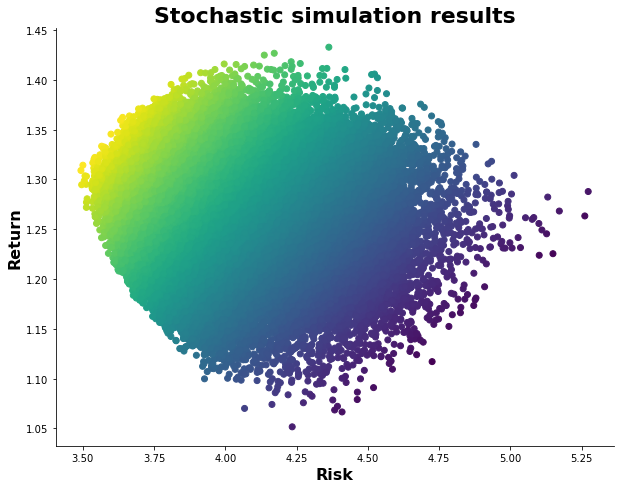

In [11]:
risk_list = []
return_list = []
total_stock = len(df.columns)
stop = 0

while stop < 100000:
    try:
        stop += 1
        weight = np.random.uniform(0,1,total_stock)
        weight = weight / sum(weight)
        return_list.append(sum(stocks_expected_return * weight))
        risk_list.append(np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T])))
    except:
        pass

fig = plt.figure(figsize = (10,8))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list))/np.array(risk_list),
                marker = 'o',label='n=1,000,000')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Stochastic simulation results', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk', fontsize=16, fontweight='bold')
ax.set_ylabel('Return', fontsize=16, fontweight='bold')

In [12]:
## invest in equal amount
covariance_matrix = df.cov() 
stocks_expected_return = df.mean() 
stocks_weights = np.array([.2, .2, .2, .2,.2])
portfolio_return = sum(stocks_weights * stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights, covariance_matrix, stocks_weights.T]))
print('portofolio expected return: '+ str(round(portfolio_return,4)))
print('portfolio risk: ' + str(round(portfolio_risk,4)))

portofolio expected return: 1.2635
portfolio risk: 4.0198


In [13]:
sharpe_ratio = []

In [14]:
stock_names  = df.columns

In [15]:
## sharp ratio
for i in stock_names:
    ex_return = df[i]
    mean_ex_return = ex_return.mean()
    std__ex_return = ex_return.std()
    sharpe_r = mean_ex_return/std__ex_return
    sharpe_ratio.append(sharpe_r)

In [9]:
sharpe_ratio

[0.37990629052998015,
 0.2229786295713035,
 0.33190936902935697,
 0.3096178396923409,
 0.22573691319306735]

In [16]:
sharpe_ratio = pd.DataFrame(sharpe_ratio)
sharpe_ratio = sharpe_ratio.rename(columns = {0: 'sharpe_ratio'}, inplace = False)

In [17]:
sharpe_ratio

,sharpe_ratio
0,0.379906
1,0.222979
2,0.331909
3,0.309618
4,0.225737


In [18]:
stock_names  

Index(['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'], dtype='object')

In [19]:
## Create a table showing the performance metrics for the ten industry portfolios
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
table_sum=pd.concat([Name_table,sharpe_ratio],axis=1)
table_sum = table_sum.set_index('Company')

In [20]:
table_sum

,sharpe_ratio
Company,
Cnsmr,0.379906
Manuf,0.222979
HiTec,0.331909
Hlth,0.309618
Other,0.225737
